In [132]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

In [75]:
stock_data = pd.read_csv('../data/cleaned_data.csv')

In [76]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372125 entries, 0 to 372124
Data columns (total 15 columns):
Date          372125 non-null object
Open          372125 non-null float64
High          372125 non-null float64
Low           372125 non-null float64
Close         372125 non-null float64
Volume        372125 non-null float64
Dividend      372125 non-null float64
Split         372125 non-null float64
Adj_Open      372125 non-null float64
Adj_High      372125 non-null float64
Adj_Low       372125 non-null float64
Adj_Close     372125 non-null float64
Adj_Volume    372125 non-null float64
Ticker        372125 non-null object
Datetime      372125 non-null object
dtypes: float64(12), object(3)
memory usage: 42.6+ MB


In [77]:
ticker_count = stock_data.groupby(['Ticker']).count()
ticker_count.reset_index(inplace = True)
ticker_count

,Ticker,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Datetime
0,AAPL,9935,9935,9935,9935,9935,9935,9935,9935,9935,9935,9935,9935,9935,9935
1,ABC,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319
2,ADM,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353
3,AMZN,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783
4,ANTM,4663,4663,4663,4663,4663,4663,4663,4663,4663,4663,4663,4663,4663,4663
5,BA,14689,14689,14689,14689,14689,14689,14689,14689,14689,14689,14689,14689,14689,14689
6,BAC,8557,8557,8557,8557,8557,8557,8557,8557,8557,8557,8557,8557,8557,8557
7,BRK_A,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125
8,BRK_B,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041
9,CAH,8154,8154,8154,8154,8154,8154,8154,8154,8154,8154,8154,8154,8154,8154


In [78]:
data_per_ticker = ticker_count[['Ticker', 'Date']].copy()
data_per_ticker.rename(columns = {'Date':'Data Points'}, inplace = True)
data_per_ticker.sort_values(by = ['Data Points'], ascending = False, inplace = True)
data_per_ticker

,Ticker,Data Points
5,BA,14689
50,XOM,12702
14,CVX,12702
26,IBM,12702
48,WFC,12090
19,F,12090
49,WMT,12030
25,HPQ,11857
29,KR,10933
21,GE,10933


In [127]:
stock_date_ranges = stock_data.groupby(['Ticker']).agg({'Date' : [np.min, np.max]})
stock_date_ranges.columns = list(map(''.join, stock_date_ranges.columns.values))
stock_date_ranges.reset_index(inplace = True)
stock_date_ranges.rename(columns = {'Dateamin':'Date Min', 'Dateamax':'Date Max'}, inplace = True)

In [136]:
stock_date_ranges['Date Min'] = pd.to_datetime(stock_date_ranges['Date Min'])
stock_date_ranges['Date Max'] = pd.to_datetime(stock_date_ranges['Date Max'])
stock_date_ranges['Day Range'] = stock_date_ranges['Date Max'] - stock_date_ranges['Date Min']
stock_date_ranges['Day Range'] = stock_date_ranges["Day Range"].dt.days

In [137]:
stock_date_ranges.head()

,Ticker,Date Min,Date Max,Day Range
0,AAPL,1980-12-12,2020-05-08,14392
1,ABC,1995-04-04,2020-05-08,9166
2,ADM,1983-04-05,2020-05-08,13548
3,AMZN,1997-05-16,2020-05-08,8393
4,ANTM,2001-10-30,2020-05-08,6765


In [139]:
stock_date_ranges.dtypes

Ticker               object
Date Min     datetime64[ns]
Date Max     datetime64[ns]
Day Range             int64
dtype: object

In [147]:
stock_data_scale = stock_data.set_index('Ticker')
stock_data_index = stock_data_scale.index
stock_data_scale.drop(columns = ['Date', 'Datetime'], inplace = True)
stock_data_columns = stock_data_scale.columns
stock_data_scale.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Ticker,,,,,,,,,,,,
AAPL,305.64,310.35,304.2900,310.13,33511985.0,0.82,1.0,305.640000,310.350000,304.290000,310.130000,33511985.0
AAPL,303.22,305.17,301.9700,303.74,28803764.0,0.00,1.0,302.420385,304.365242,301.173681,302.939013,28803764.0
AAPL,300.46,303.24,298.8700,300.63,35583438.0,0.00,1.0,299.667663,302.440332,298.081856,299.837215,35583438.0
AAPL,295.06,301.00,294.4600,297.56,36937795.0,0.00,1.0,294.281903,300.206239,293.683485,296.775311,36937795.0
AAPL,289.17,293.69,286.3172,293.16,33391986.0,0.00,1.0,288.407436,292.915516,285.562159,292.386914,33391986.0


In [149]:
stock_data_scale = scale(stock_data_scale)
stock_data_scale_df = pd.DataFrame(stock_data_scale, columns = stock_data_columns)
stock_data_scale_df.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,-0.102442,-0.102352,-0.102367,-0.102233,1.150219,5.016371,-0.005912,-0.099895,-0.099796,-0.099829,-0.099685,0.691654
1,-0.102564,-0.102612,-0.102485,-0.102556,0.938115,-0.025734,-0.005912,-0.100058,-0.100096,-0.099988,-0.100048,0.537198
2,-0.102703,-0.102709,-0.102643,-0.102713,1.243537,-0.025734,-0.005912,-0.100197,-0.100193,-0.100145,-0.100205,0.759609
3,-0.102976,-0.102821,-0.102867,-0.102868,1.304550,-0.025734,-0.005912,-0.100468,-0.100305,-0.100368,-0.100359,0.804039
4,-0.103273,-0.103188,-0.103281,-0.103090,1.144813,-0.025734,-0.005912,-0.100765,-0.100670,-0.100781,-0.100581,0.687717


In [150]:
stock_data_scale_df.mean()

Open          1.077035e-16
High          2.786853e-15
Low           1.235683e-15
Close         3.828054e-17
Volume       -4.951034e-16
Dividend      1.380875e-14
Split        -4.532704e-15
Adj_Open      2.220718e-15
Adj_High      3.870633e-15
Adj_Low       1.552430e-15
Adj_Close     9.222142e-16
Adj_Volume   -2.309887e-15
dtype: float64

In [152]:
stock_data_scale_df.std(ddof = 0)

Open          1.0
High          1.0
Low           1.0
Close         1.0
Volume        1.0
Dividend      1.0
Split         1.0
Adj_Open      1.0
Adj_High      1.0
Adj_Low       1.0
Adj_Close     1.0
Adj_Volume    1.0
dtype: float64

Text(0.5, 1.0, 'Cumulative variance ratio explained by PCA compoenents for state/resort summary statistics')

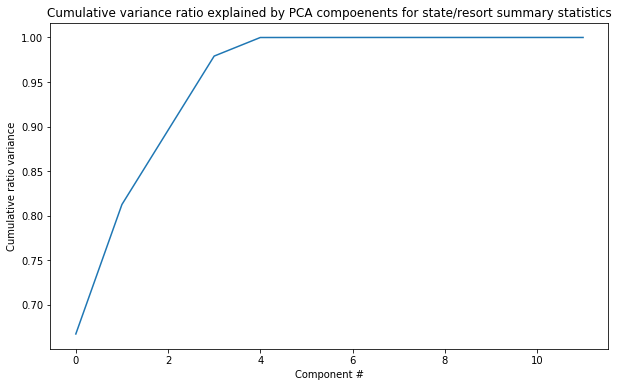

In [155]:
stock_pca = PCA().fit(stock_data_scale)
plt.subplots(figsize=(10, 6))
plt.plot(stock_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA compoenents for state/resort summary statistics')

In [157]:
stock_pca_x = stock_pca.transform(stock_data_scale)
stock_pca_x.shape

(372125, 12)

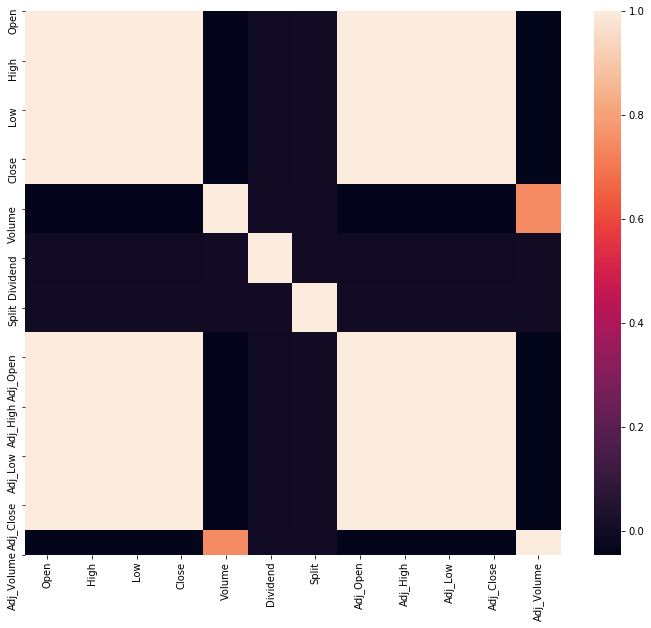

In [158]:
plt.subplots(figsize = (12,10))
sns.heatmap(stock_data.corr())

In [159]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Adj_Close', data=stock_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Adjusted Close')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

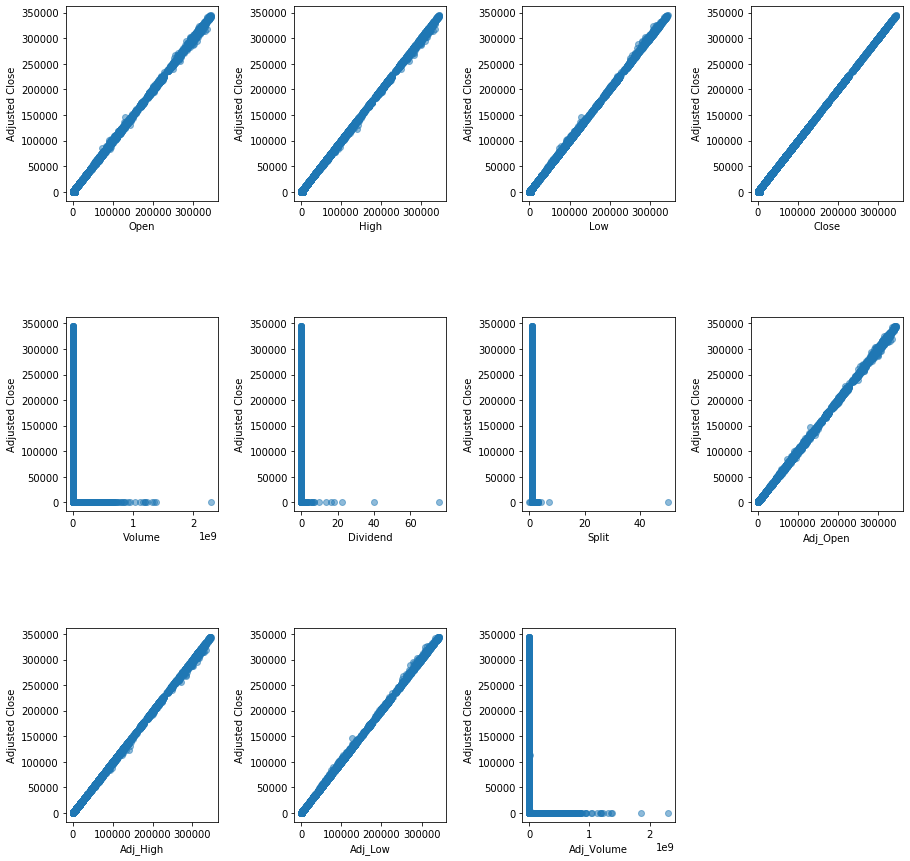

In [160]:
features = [a for a in stock_data.columns if a not in ['Ticker', 'Date', 'Datetime', 'Adj_Close']]
scatterplots(features, ncol=4, figsize=(15, 15))

In [165]:
stock_data = stock_data.merge(data_per_ticker)
stock_data = stock_data.merge(stock_date_ranges)
stock_data.tail()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Ticker,Datetime,Data Points,Date Min,Date Max,Day Range
372120,1970-01-08,62.50,63.00,62.25,62.62,33600.0,0.0,1.0,0.677149,0.682566,0.674440,0.678449,1075200.0,XOM,1970-01-08,12702,1970-01-02,2020-05-08,18389
372121,1970-01-07,62.87,62.87,62.38,62.50,28700.0,0.0,1.0,0.681158,0.681158,0.675849,0.677149,918400.0,XOM,1970-01-07,12702,1970-01-02,2020-05-08,18389
372122,1970-01-06,63.00,63.13,62.25,62.87,38500.0,0.0,1.0,0.682566,0.683974,0.674440,0.681158,1232000.0,XOM,1970-01-06,12702,1970-01-02,2020-05-08,18389
372123,1970-01-05,62.00,63.00,61.87,63.00,58800.0,0.0,1.0,0.671732,0.682566,0.670323,0.682566,1881600.0,XOM,1970-01-05,12702,1970-01-02,2020-05-08,18389
372124,1970-01-02,61.75,62.00,61.62,62.00,36700.0,0.0,1.0,0.669023,0.671732,0.667615,0.671732,1174400.0,XOM,1970-01-02,12702,1970-01-02,2020-05-08,18389


In [166]:
datapath = '../data'
save_file(stock_data, 'stock_data_step3_features.csv', datapath)

Writing file.  "../data\stock_data_step3_features.csv"
